##### Question : With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.


In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('D:\Zoho MLE\Dataset\Rotten_Tomatoes_Movies3.xls')

<>:1: SyntaxWarning: invalid escape sequence '\Z'
<>:1: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Hp\AppData\Local\Temp\ipykernel_27628\1559596433.py:1: SyntaxWarning: invalid escape sequence '\Z'
  df=pd.read_excel('D:\Zoho MLE\Dataset\Rotten_Tomatoes_Movies3.xls')


In [3]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [4]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [5]:
print(f"Total number of rows: {len(df)}")
print(f"Total number of columns: {len(df.columns)}")

Total number of rows: 16638
Total number of columns: 16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [7]:
## THIS WILL TELL WHETHER THERE ARE NULL VALUES IN DATASET
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

#### Since there are many missing values, we can use many imputation methods like Mean, Median, Mode 
### IMP. POINT ---> We can also use SMOTE (Synthetics Minority Oversampling Technique) to generate synthetic datapoints

In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [9]:
df['critics_consensus'] = df['critics_consensus'].fillna('No Consensus')
print(df['critics_consensus'].isnull().sum())

0


In [10]:
df['writers'] = df['writers'].fillna('Not available')
print(df['writers'].isnull().sum())

0


In [11]:
df.isnull().sum()

movie_title             0
movie_info             24
critics_consensus       0
rating                  0
genre                  17
directors             114
writers                 0
cast                  284
in_theaters_date      815
on_streaming_date       2
runtime_in_minutes      0
studio_name           416
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating         0
dtype: int64

In [12]:
df = df.dropna(subset=['in_theaters_date','studio_name','cast'])
df.isnull().sum()

movie_title            0
movie_info             4
critics_consensus      0
rating                 0
genre                  5
directors             50
writers                0
cast                   0
in_theaters_date       0
on_streaming_date      0
runtime_in_minutes     0
studio_name            0
tomatometer_status     0
tomatometer_rating     0
tomatometer_count      0
audience_rating        0
dtype: int64

In [13]:
df = df.map(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', str(x)) if isinstance(x, str) else x)

### Since the dataset is having many CATEGORICAL VALUES, we'll be using a mixture of the following:
#### 1. 'One Hot Encoding'
#### 2. 'Frequency Encoding'
#### 3. 'Label Encoding'
#### 4. 'Target Encoding'


In [14]:
rating_ohe = pd.get_dummies(df['rating'], prefix='rating')
df = pd.concat([df, rating_ohe], axis=1)
df.drop('rating', axis=1, inplace=True)
df.head()

,movie_title,movie_info,critics_consensus,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R
0,Percy Jackson the Olympians The Lightning Thief,A teenager discovers hes the descendant of a G...,Though it may seem like just another Harry Pot...,Action Adventure Comedy Drama Science Fiction...,Chris Columbus,Craig Titley,Logan Lerman Brandon T Jackson Alexandra Dadda...,2010-02-12,2010-06-29,83.0,...,Rotten,49,144,53.0,False,False,False,True,False,False
1,Please Give,Kate has a lot on her mind Theres the ethics p...,Nicole Holofceners newest might seem slight in...,Comedy,Nicole Holofcener,Nicole Holofcener,Catherine Keener Amanda Peet Oliver Platt Rebe...,2010-04-30,2010-10-19,90.0,...,Certified Fresh,86,140,64.0,False,False,False,False,False,True
2,10,Blake Edwards 10 stars Dudley Moore as George ...,No Consensus,Comedy Romance,Blake Edwards,Blake Edwards,Dudley Moore Bo Derek Julie Andrews Robert Web...,1979-10-05,1997-08-27,118.0,...,Fresh,68,22,53.0,False,False,False,False,False,True
3,12 Angry Men Twelve Angry Men,A Puerto Rican youth is on trial for murder ac...,Sidney Lumets feature debut is a superbly writ...,Classics Drama,Sidney Lumet,Reginald Rose,Martin Balsam John Fiedler Lee J Cobb EG Marsh...,1957-04-13,2001-03-06,95.0,...,Certified Fresh,100,51,97.0,False,False,True,False,False,False
4,20000 Leagues Under The Sea,This 1954 Disney version of Jules Vernes 20000...,One of Disneys finest liveaction adventures 20...,Action Adventure Drama Kids Family,Richard Fleischer,Earl Felton,James Mason Kirk Douglas Paul Lukas Peter Lorr...,1954-01-01,2003-05-20,127.0,...,Fresh,89,27,74.0,True,False,False,False,False,False


In [15]:
## FREQUENCY ENCODING ON 'genre' COLUMN
genre_counts = df['genre'].value_counts()
df['genre_encoded'] = df['genre'].map(genre_counts)
df.drop(columns=['genre'], inplace=True)

In [16]:
directors_mean = df.groupby('directors')['audience_rating'].mean()
df['directors_encoded'] = df['directors'].map(directors_mean)

In [17]:
writers_mean = df.groupby('writers')['audience_rating'].mean()
df['writers_encoded'] = df['writers'].map(writers_mean)


In [18]:
studio_mean = df.groupby('studio_name')['audience_rating'].mean()
df['studio_name_encoded'] = df['studio_name'].map(studio_mean)

In [19]:
print(f"Total number of rows: {len(df)}")
print(f"Total number of columns: {len(df.columns)}")

Total number of rows: 15313
Total number of columns: 24


In [20]:
columns_to_drop = ['rating', 'genre', 'directors', 'writers', 'studio_name']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15313 entries, 0 to 16637
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          15313 non-null  object        
 1   movie_info           15309 non-null  object        
 2   critics_consensus    15313 non-null  object        
 3   cast                 15313 non-null  object        
 4   in_theaters_date     15313 non-null  datetime64[ns]
 5   on_streaming_date    15313 non-null  datetime64[ns]
 6   runtime_in_minutes   15313 non-null  float64       
 7   tomatometer_status   15313 non-null  object        
 8   tomatometer_rating   15313 non-null  int64         
 9   tomatometer_count    15313 non-null  int64         
 10  audience_rating      15313 non-null  float64       
 11  rating_G             15313 non-null  bool          
 12  rating_NC17          15313 non-null  bool          
 13  rating_NR            15313 non-null 

In [21]:
df.head()

,movie_title,movie_info,critics_consensus,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,...,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,genre_encoded,directors_encoded,writers_encoded,studio_name_encoded
0,Percy Jackson the Olympians The Lightning Thief,A teenager discovers hes the descendant of a G...,Though it may seem like just another Harry Pot...,Logan Lerman Brandon T Jackson Alexandra Dadda...,2010-02-12,2010-06-29,83.0,Rotten,49,144,...,False,False,False,True,False,False,6.0,64.153846,53.000000,60.562802
1,Please Give,Kate has a lot on her mind Theres the ethics p...,Nicole Holofceners newest might seem slight in...,Catherine Keener Amanda Peet Oliver Platt Rebe...,2010-04-30,2010-10-19,90.0,Certified Fresh,86,140,...,False,False,False,False,False,True,1090.0,59.400000,54.833333,71.982580
2,10,Blake Edwards 10 stars Dudley Moore as George ...,No Consensus,Dudley Moore Bo Derek Julie Andrews Robert Web...,1979-10-05,1997-08-27,118.0,Fresh,68,22,...,False,False,False,False,False,True,248.0,61.703704,57.833333,53.000000
3,12 Angry Men Twelve Angry Men,A Puerto Rican youth is on trial for murder ac...,Sidney Lumets feature debut is a superbly writ...,Martin Balsam John Fiedler Lee J Cobb EG Marsh...,1957-04-13,2001-03-06,95.0,Certified Fresh,100,51,...,False,False,True,False,False,False,185.0,65.793103,92.000000,84.045455
4,20000 Leagues Under The Sea,This 1954 Disney version of Jules Vernes 20000...,One of Disneys finest liveaction adventures 20...,James Mason Kirk Douglas Paul Lukas Peter Lorr...,1954-01-01,2003-05-20,127.0,Fresh,89,27,...,True,False,False,False,False,False,25.0,60.687500,74.000000,57.615385


In [22]:
print(f"Total number of rows: {len(df)}")
print(f"Total number of columns: {len(df.columns)}")

Total number of rows: 15313
Total number of columns: 21


In [23]:
df

,movie_title,movie_info,critics_consensus,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,...,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,genre_encoded,directors_encoded,writers_encoded,studio_name_encoded
0,Percy Jackson the Olympians The Lightning Thief,A teenager discovers hes the descendant of a G...,Though it may seem like just another Harry Pot...,Logan Lerman Brandon T Jackson Alexandra Dadda...,2010-02-12,2010-06-29,83.0,Rotten,49,144,...,False,False,False,True,False,False,6.0,64.153846,53.000000,60.562802
1,Please Give,Kate has a lot on her mind Theres the ethics p...,Nicole Holofceners newest might seem slight in...,Catherine Keener Amanda Peet Oliver Platt Rebe...,2010-04-30,2010-10-19,90.0,Certified Fresh,86,140,...,False,False,False,False,False,True,1090.0,59.400000,54.833333,71.982580
2,10,Blake Edwards 10 stars Dudley Moore as George ...,No Consensus,Dudley Moore Bo Derek Julie Andrews Robert Web...,1979-10-05,1997-08-27,118.0,Fresh,68,22,...,False,False,False,False,False,True,248.0,61.703704,57.833333,53.000000
3,12 Angry Men Twelve Angry Men,A Puerto Rican youth is on trial for murder ac...,Sidney Lumets feature debut is a superbly writ...,Martin Balsam John Fiedler Lee J Cobb EG Marsh...,1957-04-13,2001-03-06,95.0,Certified Fresh,100,51,...,False,False,True,False,False,False,185.0,65.793103,92.000000,84.045455
4,20000 Leagues Under The Sea,This 1954 Disney version of Jules Vernes 20000...,One of Disneys finest liveaction adventures 20...,James Mason Kirk Douglas Paul Lukas Peter Lorr...,1954-01-01,2003-05-20,127.0,Fresh,89,27,...,True,False,False,False,False,False,25.0,60.687500,74.000000,57.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,Based on a 1940s Los Angeles murder trial this...,No Consensus,Daniel Valdez Edward James Olmos Charles Aidma...,1981-10-02,2003-05-27,104.0,Rotten,56,9,...,False,False,False,False,False,True,73.0,76.000000,76.000000,57.694268
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly wellrounded Zootopia offers a ...,Ginnifer Goodwin Jason Bateman Idris Elba Jenn...,2016-03-04,2016-06-07,108.0,Certified Fresh,97,279,...,False,False,False,True,False,False,14.0,92.000000,92.000000,78.500000
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,No Consensus,Anthony Quinn Alan Bates Irene Papas Lila Kedr...,1964-12-17,2004-08-03,142.0,Fresh,78,9,...,False,False,True,False,False,False,22.0,NaN,68.426506,64.966667
16636,Zulu,Filmed on a grand scale Zulu is a rousing recr...,No Consensus,Stanley Baker Jack Hawkins Ulla Jacobsson Jame...,1964-06-17,2001-02-02,139.0,Fresh,95,21,...,False,False,False,True,False,False,185.0,58.000000,91.000000,63.419878


In [24]:
df=df.drop(columns=['in_theaters_date','on_streaming_date'],errors='ignore')

In [25]:
df

,movie_title,movie_info,critics_consensus,cast,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,genre_encoded,directors_encoded,writers_encoded,studio_name_encoded
0,Percy Jackson the Olympians The Lightning Thief,A teenager discovers hes the descendant of a G...,Though it may seem like just another Harry Pot...,Logan Lerman Brandon T Jackson Alexandra Dadda...,83.0,Rotten,49,144,53.0,False,False,False,True,False,False,6.0,64.153846,53.000000,60.562802
1,Please Give,Kate has a lot on her mind Theres the ethics p...,Nicole Holofceners newest might seem slight in...,Catherine Keener Amanda Peet Oliver Platt Rebe...,90.0,Certified Fresh,86,140,64.0,False,False,False,False,False,True,1090.0,59.400000,54.833333,71.982580
2,10,Blake Edwards 10 stars Dudley Moore as George ...,No Consensus,Dudley Moore Bo Derek Julie Andrews Robert Web...,118.0,Fresh,68,22,53.0,False,False,False,False,False,True,248.0,61.703704,57.833333,53.000000
3,12 Angry Men Twelve Angry Men,A Puerto Rican youth is on trial for murder ac...,Sidney Lumets feature debut is a superbly writ...,Martin Balsam John Fiedler Lee J Cobb EG Marsh...,95.0,Certified Fresh,100,51,97.0,False,False,True,False,False,False,185.0,65.793103,92.000000,84.045455
4,20000 Leagues Under The Sea,This 1954 Disney version of Jules Vernes 20000...,One of Disneys finest liveaction adventures 20...,James Mason Kirk Douglas Paul Lukas Peter Lorr...,127.0,Fresh,89,27,74.0,True,False,False,False,False,False,25.0,60.687500,74.000000,57.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,Based on a 1940s Los Angeles murder trial this...,No Consensus,Daniel Valdez Edward James Olmos Charles Aidma...,104.0,Rotten,56,9,74.0,False,False,False,False,False,True,73.0,76.000000,76.000000,57.694268
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly wellrounded Zootopia offers a ...,Ginnifer Goodwin Jason Bateman Idris Elba Jenn...,108.0,Certified Fresh,97,279,92.0,False,False,False,True,False,False,14.0,92.000000,92.000000,78.500000
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,No Consensus,Anthony Quinn Alan Bates Irene Papas Lila Kedr...,142.0,Fresh,78,9,87.0,False,False,True,False,False,False,22.0,NaN,68.426506,64.966667
16636,Zulu,Filmed on a grand scale Zulu is a rousing recr...,No Consensus,Stanley Baker Jack Hawkins Ulla Jacobsson Jame...,139.0,Fresh,95,21,91.0,False,False,False,True,False,False,185.0,58.000000,91.000000,63.419878


### We'll also drop the columns that are not necessary so as to make the calculations easier

In [26]:
df=df.drop(columns=['movie_title'],errors='ignore')

In [27]:
df

,movie_info,critics_consensus,cast,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,genre_encoded,directors_encoded,writers_encoded,studio_name_encoded
0,A teenager discovers hes the descendant of a G...,Though it may seem like just another Harry Pot...,Logan Lerman Brandon T Jackson Alexandra Dadda...,83.0,Rotten,49,144,53.0,False,False,False,True,False,False,6.0,64.153846,53.000000,60.562802
1,Kate has a lot on her mind Theres the ethics p...,Nicole Holofceners newest might seem slight in...,Catherine Keener Amanda Peet Oliver Platt Rebe...,90.0,Certified Fresh,86,140,64.0,False,False,False,False,False,True,1090.0,59.400000,54.833333,71.982580
2,Blake Edwards 10 stars Dudley Moore as George ...,No Consensus,Dudley Moore Bo Derek Julie Andrews Robert Web...,118.0,Fresh,68,22,53.0,False,False,False,False,False,True,248.0,61.703704,57.833333,53.000000
3,A Puerto Rican youth is on trial for murder ac...,Sidney Lumets feature debut is a superbly writ...,Martin Balsam John Fiedler Lee J Cobb EG Marsh...,95.0,Certified Fresh,100,51,97.0,False,False,True,False,False,False,185.0,65.793103,92.000000,84.045455
4,This 1954 Disney version of Jules Vernes 20000...,One of Disneys finest liveaction adventures 20...,James Mason Kirk Douglas Paul Lukas Peter Lorr...,127.0,Fresh,89,27,74.0,True,False,False,False,False,False,25.0,60.687500,74.000000,57.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Based on a 1940s Los Angeles murder trial this...,No Consensus,Daniel Valdez Edward James Olmos Charles Aidma...,104.0,Rotten,56,9,74.0,False,False,False,False,False,True,73.0,76.000000,76.000000,57.694268
16634,The modern mammal metropolis of Zootopia is a ...,The brilliantly wellrounded Zootopia offers a ...,Ginnifer Goodwin Jason Bateman Idris Elba Jenn...,108.0,Certified Fresh,97,279,92.0,False,False,False,True,False,False,14.0,92.000000,92.000000,78.500000
16635,If ever there was a role that Anthony Quinn wa...,No Consensus,Anthony Quinn Alan Bates Irene Papas Lila Kedr...,142.0,Fresh,78,9,87.0,False,False,True,False,False,False,22.0,NaN,68.426506,64.966667
16636,Filmed on a grand scale Zulu is a rousing recr...,No Consensus,Stanley Baker Jack Hawkins Ulla Jacobsson Jame...,139.0,Fresh,95,21,91.0,False,False,False,True,False,False,185.0,58.000000,91.000000,63.419878


In [28]:
unique_values = df['tomatometer_status'].unique()
unique_values

array(['Rotten', 'Certified Fresh', 'Fresh'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tomatometer_status_encoded'] = le.fit_transform(df['tomatometer_status'])


In [30]:
df=df.drop(columns=['tomatometer_status'],errors='ignore')

In [31]:
df

,movie_info,critics_consensus,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,genre_encoded,directors_encoded,writers_encoded,studio_name_encoded,tomatometer_status_encoded
0,A teenager discovers hes the descendant of a G...,Though it may seem like just another Harry Pot...,Logan Lerman Brandon T Jackson Alexandra Dadda...,83.0,49,144,53.0,False,False,False,True,False,False,6.0,64.153846,53.000000,60.562802,2
1,Kate has a lot on her mind Theres the ethics p...,Nicole Holofceners newest might seem slight in...,Catherine Keener Amanda Peet Oliver Platt Rebe...,90.0,86,140,64.0,False,False,False,False,False,True,1090.0,59.400000,54.833333,71.982580,0
2,Blake Edwards 10 stars Dudley Moore as George ...,No Consensus,Dudley Moore Bo Derek Julie Andrews Robert Web...,118.0,68,22,53.0,False,False,False,False,False,True,248.0,61.703704,57.833333,53.000000,1
3,A Puerto Rican youth is on trial for murder ac...,Sidney Lumets feature debut is a superbly writ...,Martin Balsam John Fiedler Lee J Cobb EG Marsh...,95.0,100,51,97.0,False,False,True,False,False,False,185.0,65.793103,92.000000,84.045455,0
4,This 1954 Disney version of Jules Vernes 20000...,One of Disneys finest liveaction adventures 20...,James Mason Kirk Douglas Paul Lukas Peter Lorr...,127.0,89,27,74.0,True,False,False,False,False,False,25.0,60.687500,74.000000,57.615385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Based on a 1940s Los Angeles murder trial this...,No Consensus,Daniel Valdez Edward James Olmos Charles Aidma...,104.0,56,9,74.0,False,False,False,False,False,True,73.0,76.000000,76.000000,57.694268,2
16634,The modern mammal metropolis of Zootopia is a ...,The brilliantly wellrounded Zootopia offers a ...,Ginnifer Goodwin Jason Bateman Idris Elba Jenn...,108.0,97,279,92.0,False,False,False,True,False,False,14.0,92.000000,92.000000,78.500000,0
16635,If ever there was a role that Anthony Quinn wa...,No Consensus,Anthony Quinn Alan Bates Irene Papas Lila Kedr...,142.0,78,9,87.0,False,False,True,False,False,False,22.0,NaN,68.426506,64.966667,1
16636,Filmed on a grand scale Zulu is a rousing recr...,No Consensus,Stanley Baker Jack Hawkins Ulla Jacobsson Jame...,139.0,95,21,91.0,False,False,False,True,False,False,185.0,58.000000,91.000000,63.419878,1


In [32]:
df['movie_info'] = df['movie_info'].fillna("")
df['critics_consensus'] = df['critics_consensus'].fillna("")
df['cast'] = df['cast'].fillna("")

In [33]:
print(f"Total number of rows: {len(df)}")
print(f"Total number of columns: {len(df.columns)}")

Total number of rows: 15313
Total number of columns: 18


In [34]:
df

,movie_info,critics_consensus,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,genre_encoded,directors_encoded,writers_encoded,studio_name_encoded,tomatometer_status_encoded
0,A teenager discovers hes the descendant of a G...,Though it may seem like just another Harry Pot...,Logan Lerman Brandon T Jackson Alexandra Dadda...,83.0,49,144,53.0,False,False,False,True,False,False,6.0,64.153846,53.000000,60.562802,2
1,Kate has a lot on her mind Theres the ethics p...,Nicole Holofceners newest might seem slight in...,Catherine Keener Amanda Peet Oliver Platt Rebe...,90.0,86,140,64.0,False,False,False,False,False,True,1090.0,59.400000,54.833333,71.982580,0
2,Blake Edwards 10 stars Dudley Moore as George ...,No Consensus,Dudley Moore Bo Derek Julie Andrews Robert Web...,118.0,68,22,53.0,False,False,False,False,False,True,248.0,61.703704,57.833333,53.000000,1
3,A Puerto Rican youth is on trial for murder ac...,Sidney Lumets feature debut is a superbly writ...,Martin Balsam John Fiedler Lee J Cobb EG Marsh...,95.0,100,51,97.0,False,False,True,False,False,False,185.0,65.793103,92.000000,84.045455,0
4,This 1954 Disney version of Jules Vernes 20000...,One of Disneys finest liveaction adventures 20...,James Mason Kirk Douglas Paul Lukas Peter Lorr...,127.0,89,27,74.0,True,False,False,False,False,False,25.0,60.687500,74.000000,57.615385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Based on a 1940s Los Angeles murder trial this...,No Consensus,Daniel Valdez Edward James Olmos Charles Aidma...,104.0,56,9,74.0,False,False,False,False,False,True,73.0,76.000000,76.000000,57.694268,2
16634,The modern mammal metropolis of Zootopia is a ...,The brilliantly wellrounded Zootopia offers a ...,Ginnifer Goodwin Jason Bateman Idris Elba Jenn...,108.0,97,279,92.0,False,False,False,True,False,False,14.0,92.000000,92.000000,78.500000,0
16635,If ever there was a role that Anthony Quinn wa...,No Consensus,Anthony Quinn Alan Bates Irene Papas Lila Kedr...,142.0,78,9,87.0,False,False,True,False,False,False,22.0,NaN,68.426506,64.966667,1
16636,Filmed on a grand scale Zulu is a rousing recr...,No Consensus,Stanley Baker Jack Hawkins Ulla Jacobsson Jame...,139.0,95,21,91.0,False,False,False,True,False,False,185.0,58.000000,91.000000,63.419878,1


### HERE I'LL BE USING TF-IDF VECTORIZATION TO ENCODE THE COLUMNS WITH LARGE TEXTUAL MATTER 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF separately to each column
tfidf_movie_info = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
tfidf_critics_consensus = TfidfVectorizer(max_features=100)
tfidf_cast = TfidfVectorizer(max_features=100)

# Transform each column
movie_info_features = tfidf_movie_info.fit_transform(df['movie_info']).toarray()
critics_consensus_features = tfidf_critics_consensus.fit_transform(df['critics_consensus']).toarray()
cast_features = tfidf_cast.fit_transform(df['cast']).toarray()

# Convert each TF-IDF result into DataFrames
movie_info_df = pd.DataFrame(movie_info_features, columns=tfidf_movie_info.get_feature_names_out())
critics_consensus_df = pd.DataFrame(critics_consensus_features, columns=tfidf_critics_consensus.get_feature_names_out())
cast_df = pd.DataFrame(cast_features, columns=tfidf_cast.get_feature_names_out())

In [36]:
print(f"Total number of rows: {len(df)}")
print(f"Total number of columns: {len(df.columns)}")

Total number of rows: 15313
Total number of columns: 18


In [37]:
# Transform each column
movie_info_features = tfidf_movie_info.fit_transform(df['movie_info']).toarray()
critics_consensus_features = tfidf_critics_consensus.fit_transform(df['critics_consensus']).toarray()
cast_features = tfidf_cast.fit_transform(df['cast']).toarray()

# Convert each TF-IDF result into DataFrames
movie_info_df = pd.DataFrame(movie_info_features, columns=tfidf_movie_info.get_feature_names_out())
critics_consensus_df = pd.DataFrame(critics_consensus_features, columns=tfidf_critics_consensus.get_feature_names_out())
cast_df = pd.DataFrame(cast_features, columns=tfidf_cast.get_feature_names_out())

# Step 2: Rename TF-IDF columns to avoid conflicts
movie_info_df.columns = [f"movie_info_{col}" for col in movie_info_df.columns]
critics_consensus_df.columns = [f"critics_consensus_{col}" for col in critics_consensus_df.columns]
cast_df.columns = [f"cast_{col}" for col in cast_df.columns]

# Step 3: Concatenate the original DataFrame with the TF-IDF DataFrames
df = pd.concat([df.reset_index(drop=True), 
                movie_info_df.reset_index(drop=True), 
                critics_consensus_df.reset_index(drop=True), 
                cast_df.reset_index(drop=True)], axis=1)

# Step 4: Drop the original text columns (optional)
df = df.drop(columns=['movie_info', 'critics_consensus', 'cast'])


In [38]:
print(f"Total number of rows: {len(df)}")
print(f"Total number of columns: {len(df.columns)}")

Total number of rows: 15313
Total number of columns: 315


In [39]:
df

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,...,cast_susan,cast_taylor,cast_thomas,cast_tim,cast_tom,cast_tony,cast_van,cast_william,cast_williams,cast_wilson
0,83.0,49,144,53.0,False,False,False,True,False,False,...,0.0,0.000000,0.000000,0.221626,0.181062,0.00000,0.244384,0.000000,0.0,0.0
1,90.0,86,140,64.0,False,False,False,False,False,True,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
2,118.0,68,22,53.0,False,False,False,False,False,True,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.199657,0.0,0.0
3,95.0,100,51,97.0,False,False,True,False,False,False,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
4,127.0,89,27,74.0,True,False,False,False,False,False,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15308,104.0,56,9,74.0,False,False,False,False,False,True,...,0.0,0.000000,0.197728,0.000000,0.000000,0.21369,0.000000,0.000000,0.0,0.0
15309,108.0,97,279,92.0,False,False,False,True,False,False,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
15310,142.0,78,9,87.0,False,False,True,False,False,False,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
15311,139.0,95,21,91.0,False,False,False,True,False,False,...,0.0,0.245946,0.000000,0.000000,0.204537,0.00000,0.276069,0.000000,0.0,0.0


In [40]:
df.corr()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,...,cast_susan,cast_taylor,cast_thomas,cast_tim,cast_tom,cast_tony,cast_van,cast_william,cast_williams,cast_wilson
runtime_in_minutes,1.000000,0.088356,0.179629,0.172565,-0.028321,0.004195,-0.086236,0.002706,0.064803,0.035069,...,0.000224,0.008440,0.022389,0.007144,0.035055,0.018822,0.012320,0.033565,0.026902,0.005531
tomatometer_rating,0.088356,1.000000,0.097525,0.667364,0.074136,0.014499,0.266166,-0.006177,-0.174931,-0.126992,...,-0.000892,-0.064720,-0.019292,-0.048371,-0.012646,-0.015715,-0.017867,0.006779,-0.029998,-0.034557
tomatometer_count,0.179629,0.097525,1.000000,0.144170,-0.066352,-0.003260,-0.310556,-0.020802,0.281186,0.096638,...,-0.013986,0.029602,0.038724,0.064994,0.063339,-0.000411,-0.012575,-0.032762,0.026384,0.042389
audience_rating,0.172565,0.667364,0.144170,1.000000,0.078733,0.018780,0.111527,0.041835,-0.030033,-0.138793,...,-0.003541,-0.033157,-0.013284,-0.024596,-0.002233,0.003954,-0.007905,0.010421,-0.000457,-0.020291
rating_G,-0.028321,0.074136,-0.066352,0.078733,1.000000,-0.009682,-0.120950,-0.079117,-0.097514,-0.162763,...,-0.004490,0.028387,-0.008414,0.001731,-0.006430,-0.004897,-0.001520,0.017562,-0.008413,-0.009574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cast_tony,0.018822,-0.015715,-0.000411,0.003954,-0.004897,0.017435,-0.067713,0.011529,0.015811,0.040594,...,0.013774,0.011188,-0.000439,0.005763,-0.001344,1.000000,-0.002420,0.015950,-0.000158,0.001397
cast_van,0.012320,-0.017867,-0.012575,-0.007905,-0.001520,0.011391,-0.024318,-0.002227,0.001057,0.022056,...,-0.005503,-0.001521,0.014363,0.002572,0.006177,-0.002420,1.000000,0.010553,-0.011078,-0.009209
cast_william,0.033565,0.006779,-0.032762,0.010421,0.017562,-0.008145,-0.012416,0.020264,-0.001977,-0.007556,...,0.009904,0.009314,0.016126,0.001027,0.029358,0.015950,0.010553,1.000000,-0.002420,0.008997
cast_williams,0.026902,-0.029998,0.026384,-0.000457,-0.008413,-0.002421,-0.055394,0.007671,0.032428,0.022299,...,0.006936,0.013567,0.008192,0.015668,-0.004593,-0.000158,-0.011078,-0.002420,1.000000,0.014088


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15313 entries, 0 to 15312
Columns: 315 entries, runtime_in_minutes to cast_wilson
dtypes: bool(6), float64(306), int32(1), int64(2)
memory usage: 36.1 MB


In [54]:
boolean_columns = ['rating_G', 'rating_NC17', 'rating_NR', 'rating_PG', 'rating_PG13', 'rating_R']
df[boolean_columns] = df[boolean_columns].astype(int)

In [55]:
df

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG13,rating_R,...,cast_susan,cast_taylor,cast_thomas,cast_tim,cast_tom,cast_tony,cast_van,cast_william,cast_williams,cast_wilson
0,83.0,49,144,53.0,0,0,0,1,0,0,...,0.0,0.000000,0.000000,0.221626,0.181062,0.00000,0.244384,0.000000,0.0,0.0
1,90.0,86,140,64.0,0,0,0,0,0,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
2,118.0,68,22,53.0,0,0,0,0,0,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.199657,0.0,0.0
3,95.0,100,51,97.0,0,0,1,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
4,127.0,89,27,74.0,1,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15308,104.0,56,9,74.0,0,0,0,0,0,1,...,0.0,0.000000,0.197728,0.000000,0.000000,0.21369,0.000000,0.000000,0.0,0.0
15309,108.0,97,279,92.0,0,0,0,1,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
15310,142.0,78,9,87.0,0,0,1,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
15311,139.0,95,21,91.0,0,0,0,1,0,0,...,0.0,0.245946,0.000000,0.000000,0.204537,0.00000,0.276069,0.000000,0.0,0.0


In [56]:
df.to_csv('modified_dataset.csv', index=True)

In [57]:
correlation_matrix = df.corr()

In [58]:
target_correlation = correlation_matrix['audience_rating'].sort_values(ascending=False)
print(target_correlation)

audience_rating                1.000000
writers_encoded                0.900178
directors_encoded              0.799905
tomatometer_rating             0.667364
studio_name_encoded            0.535552
                                 ...   
movie_info_when               -0.082383
rating_R                      -0.138793
critics_consensus_consensus   -0.147210
critics_consensus_no          -0.147994
tomatometer_status_encoded    -0.589227
Name: audience_rating, Length: 315, dtype: float64


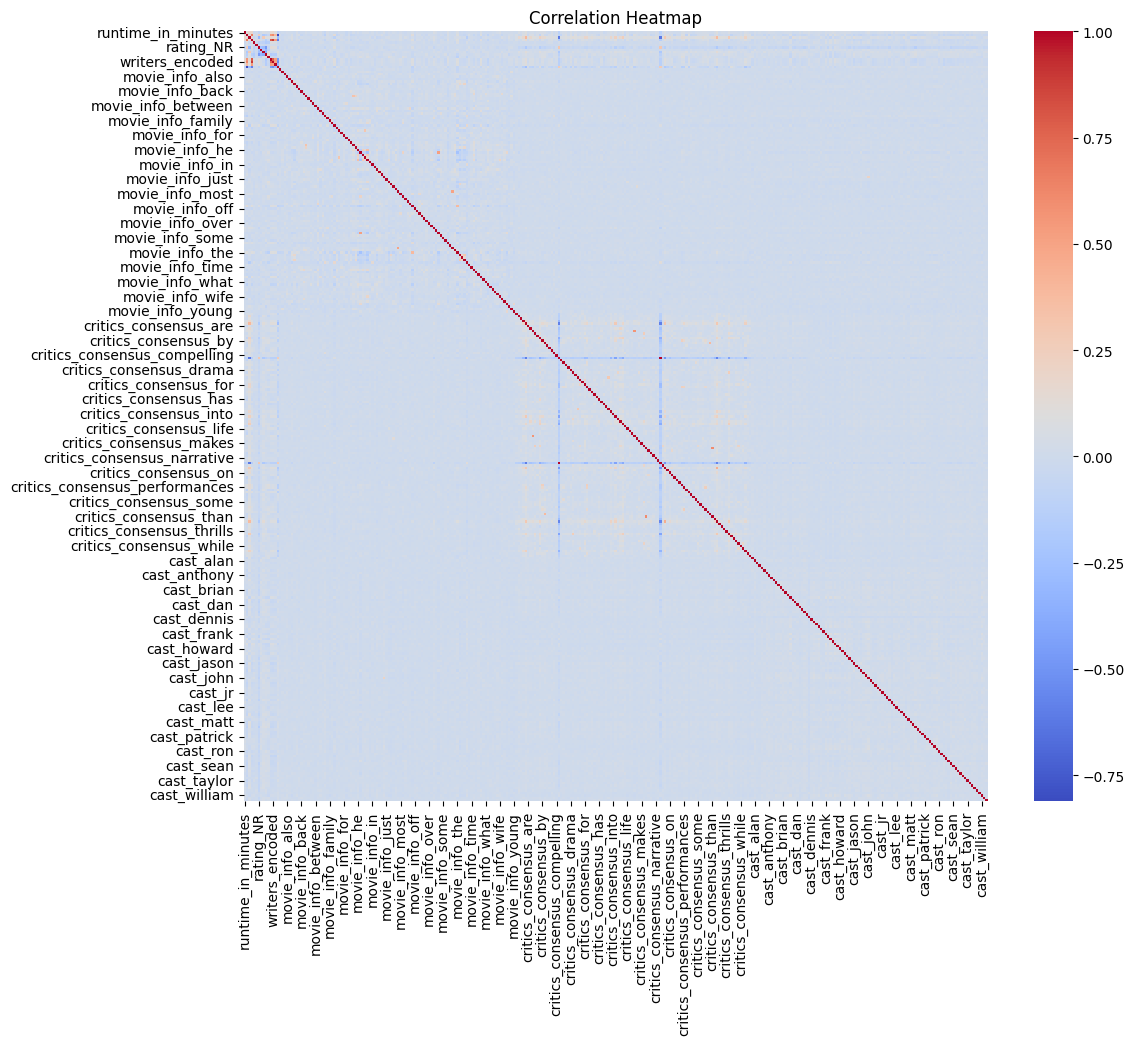

In [60]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Extracting the best features that will be suitable for the model using threshold value

In [67]:
threshold = 0.5 # Correlation threshold
strong_correlation_features = target_correlation[abs(target_correlation) > threshold]
print(strong_correlation_features)


audience_rating               1.000000
writers_encoded               0.900178
directors_encoded             0.799905
tomatometer_rating            0.667364
studio_name_encoded           0.535552
tomatometer_status_encoded   -0.589227
Name: audience_rating, dtype: float64


In [68]:
# Load the dataset
file_path = 'modified_dataset.csv'
data = pd.read_csv(file_path)

# List of columns to keep
columns_to_keep = [
    'audience_rating',
    'writers_encoded',
    'directors_encoded',
    'tomatometer_rating',
    'studio_name_encoded',
    'tomatometer_status_encoded'
]

# Keep only the specified columns
filtered_data = data[columns_to_keep]

# Save the filtered dataset
filtered_data.to_csv('filtered_dataset.csv', index=False)

In [69]:
pd.read_csv('filtered_dataset.csv')

,audience_rating,writers_encoded,directors_encoded,tomatometer_rating,studio_name_encoded,tomatometer_status_encoded
0,53.0,53.000000,64.153846,49,60.562802,2
1,64.0,54.833333,59.400000,86,71.982580,0
2,53.0,57.833333,61.703704,68,53.000000,1
3,97.0,92.000000,65.793103,100,84.045455,0
4,74.0,74.000000,60.687500,89,57.615385,1
...,...,...,...,...,...,...
15308,74.0,76.000000,76.000000,56,57.694268,2
15309,92.0,92.000000,92.000000,97,78.500000,0
15310,87.0,68.426506,NaN,78,64.966667,1
15311,91.0,91.000000,58.000000,95,63.419878,1
